In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [25]:
data = pd.read_csv('Online Retail.csv', encoding='ISO-8859-1')


In [26]:
data.shape

(541909, 7)

In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [28]:
data['Country'] = data['Country'].count()

In [29]:
data['Description'] = data['Description'].count()

In [30]:
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,85123A,540455,6,2.55,17850.0,541909
1,536365,71053,540455,6,3.39,17850.0,541909
2,536365,84406B,540455,8,2.75,17850.0,541909
3,536365,84029G,540455,6,3.39,17850.0,541909
4,536365,84029E,540455,6,3.39,17850.0,541909
...,...,...,...,...,...,...,...
541904,581587,22613,540455,12,0.85,12680.0,541909
541905,581587,22899,540455,6,2.10,12680.0,541909
541906,581587,23254,540455,4,4.15,12680.0,541909
541907,581587,23255,540455,4,4.15,12680.0,541909


In [31]:
X = data[['UnitPrice','Quantity']]

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

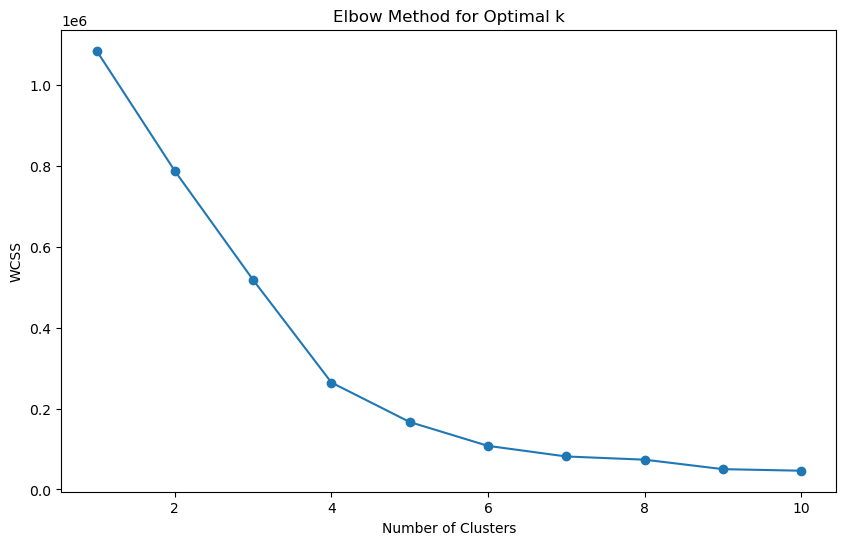

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [36]:
data['Cluster'] = y_kmeans

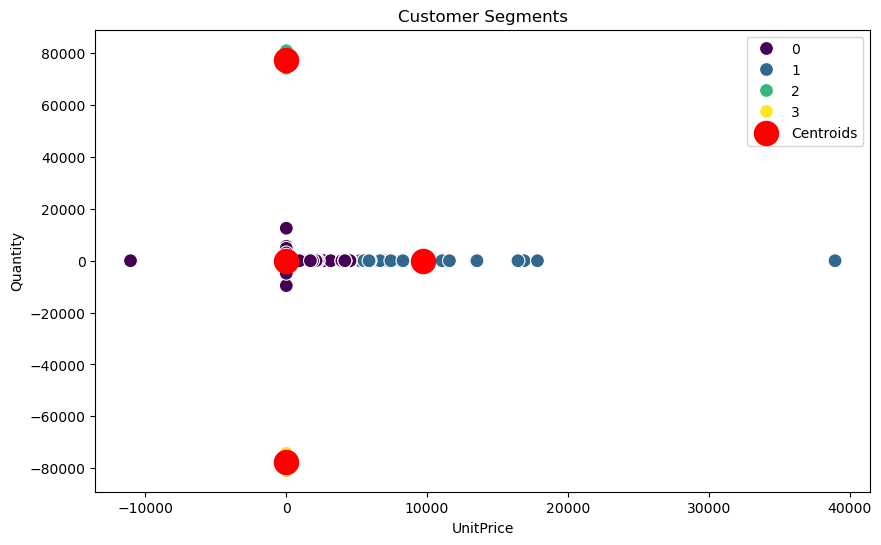

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='UnitPrice', y='Quantity', hue='Cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=300, c='red', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.legend()
plt.show()